<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/20220201_Compara%C3%A7%C3%A3o_Carteiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código para comparação de três carteiras fictícias

## 1. Instalando e importando bibliotecas

In [12]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 17.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from functools import reduce

## 2. Importando dados para a Carteira 01

Repare que vou importar também os dados da cotação do dólar. Posteriormente vou converter a cotação do Ethereum para reais, por isso que estou trazendo a cotação do dólar.

In [14]:
ativos01 = ['ITUB4.SA','VALE3.SA', 'MGLU3.SA','PETR4.SA', 
          'BBDC4.SA', 'B3SA3.SA','ABEV3.SA','BPAC11.SA',
          'BBAS3.SA','CSAN3.SA','RENT3.SA', 'LREN3.SA']

In [15]:
inicio = '2020-01-05'
fim = '2021-12-05'

In [16]:
precos = yf.download(ativos01, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [17]:
precos.head()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA
Date,,,,,,,,,,,,
2020-01-06,17.749458,13.197676,47.288906,31.178703,18.262232,17.286381,34.855518,54.785286,11.932190,25.040264,47.603073,43.743118
2020-01-07,17.786785,13.623506,46.932007,30.637064,18.335096,17.597998,34.046894,54.756474,11.898048,24.942738,48.066002,44.061340
2020-01-08,17.702797,13.587006,46.503738,30.163116,18.172602,17.307789,33.492130,55.111790,12.263844,24.788319,47.829609,44.069500
2020-01-09,17.562817,13.580923,45.557953,29.680714,18.296289,17.122248,32.824547,54.689251,12.700356,24.707045,48.085693,43.490173
2020-01-10,17.628141,13.474465,44.487263,29.139069,18.553371,17.376772,32.533066,54.862110,12.632074,24.601389,47.130291,43.539131


## 3. Simulação da Carteira 01

Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira

In [18]:
compras = {'ITUB4.SA': 1200, 'VALE3.SA': 1200, 'MGLU3.SA': 1000,
           'PETR4.SA': 1000, 'BBDC4.SA': 1000, 'B3SA3.SA': 900, 
           'ABEV3.SA': 800, 'BPAC11.SA': 700, 'BBAS3.SA': 600, 
           'CSAN3.SA': 600, 'RENT3.SA': 500, 'LREN3.SA':500}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Qual o valor total da nossa carteira?

In [19]:
sum(compras.values())

10000

Obtendo preços dos ativos no primeiro dia do investimento

In [20]:
precos.iloc[0]

ABEV3.SA     17.749458
B3SA3.SA     13.197676
BBAS3.SA     47.288906
BBDC4.SA     31.178703
BPAC11.SA    18.262232
CSAN3.SA     17.286381
ITUB4.SA     34.855518
LREN3.SA     54.785286
MGLU3.SA     11.932190
PETR4.SA     25.040264
RENT3.SA     47.603073
VALE3.SA     43.743118
Name: 2020-01-06 00:00:00, dtype: float64

Quantidade de papéis comprados de cada ativo (determinados no primeiro dia)

In [21]:
compras_df/(precos.iloc[0])

ABEV3.SA     45.071798
B3SA3.SA     68.193826
BBAS3.SA     12.687965
BBDC4.SA     32.073175
BPAC11.SA    38.330474
CSAN3.SA     34.709406
ITUB4.SA     34.427834
LREN3.SA      9.126538
MGLU3.SA     83.806913
PETR4.SA     39.935681
RENT3.SA     10.503524
VALE3.SA     27.432887
dtype: float64

Criando um dataframe que contém a posição diária de cada ativo

In [22]:
PL01 = precos*compras_df/(precos.iloc[0])

Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [23]:
PL01['Carteira 01'] = PL01.sum(axis = 1)

In [24]:
PL01.tail()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA,Carteira 01
Date,,,,,,,,,,,,,
2021-11-29,708.810737,770.903258,388.793735,640.923017,816.612115,732.976941,778.320103,262.743101,673.807574,1047.664170,547.560234,1906.585613,9275.700597
2021-11-30,696.664628,744.759569,401.791392,629.540113,783.250021,725.128516,768.702677,258.294443,653.693935,1046.242205,535.613469,1918.930328,9162.611297
2021-12-01,687.988860,738.056117,394.977100,627.010538,787.041192,724.104754,763.809387,256.841822,576.591569,1052.285785,528.277743,1926.611712,9063.596580
2021-12-02,694.495707,768.221878,405.829515,658.944112,791.969655,748.673856,792.684252,259.747063,566.534749,1132.575937,562.965287,2016.042772,9398.684781
2021-12-03,694.061915,779.617843,406.334286,657.045187,799.931068,763.347075,789.934230,265.557544,590.838750,1148.550194,574.912051,1971.601630,9441.731774


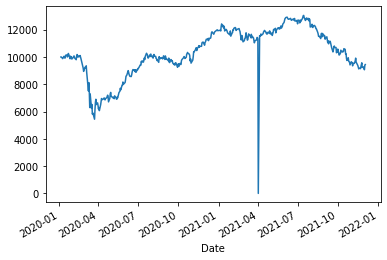

In [25]:
PL01['Carteira 01'].plot();

## 4. Obtendo dados do IBOV (ou outros benchmarks)

Obtendo dados do IBOV para comparar com a nossa carteira

In [34]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [37]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [38]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

## 5. Carteira 02

Utilizando o conhecimento adquirido para a carteira 01, vamos agora criar as carteiras 02 e 03

In [60]:
ativos02 = ['BPAN4.SA','VALE3.SA', 'WEGE3.SA','TOTS3.SA', 'BPAC11.SA',
            'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA', 'TSLA34.SA']

precos02 = yf.download(ativos02, start = inicio, end = fim)['Adj Close']

compras02 = {'BPAN4.SA': 1500, 'VALE3.SA': 1400, 'WEGE3.SA': 1300, 
           'TOTS3.SA': 1200, 'BPAC11.SA': 1100, 'KNRI11.SA': 1000, 
        'SMAL11.SA': 800, 'AAPL34.SA': 700, 'IVVB11.SA': 500, 'TSLA34.SA': 500}
           
compras_df02 = pd.Series(data=compras02, index=list(compras02.keys()))

PL02 = precos02*(compras_df02/(precos02.iloc[0]))

PL02['Carteira 02'] = PL02.sum(axis = 1)

[*********************100%***********************]  10 of 10 completed


In [62]:
precos02.head()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,IVVB11.SA,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-06,30.097784,18.262234,10.943401,74.25,197.979996,139.100006,22.585520,11.48750,43.743122,17.104216
2020-01-07,30.171686,18.335094,10.933976,74.25,198.750000,139.399994,22.680433,12.01500,44.061337,17.236616
2020-01-08,30.425415,18.172602,10.839718,74.25,187.500000,138.199997,22.376062,12.16325,44.069496,16.584421
2020-01-09,31.334410,18.296291,10.839718,74.25,181.000000,138.800003,22.745888,12.16325,43.490170,16.339231
2020-01-10,31.467434,18.553371,10.764311,74.25,178.899994,139.399994,22.575703,12.20000,43.539131,16.672686


In [63]:
sum(compras02.values())

10000

In [64]:
PL02.head()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,IVVB11.SA,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,Carteira 02
Date,,,,,,,,,,,
2020-01-06,700.000000,1100.000000,1500.000000,500.0,1000.000000,800.000000,1200.000000,500.000000,1400.000000,1300.000000,10000.000000
2020-01-07,701.718781,1104.388663,1498.708103,500.0,1003.889303,801.725307,1205.042885,522.959745,1410.184462,1310.063055,10058.680305
2020-01-08,707.619886,1094.601140,1485.788220,500.0,947.065381,794.823815,1188.871238,529.412395,1410.445612,1260.493201,9919.120889
2020-01-09,728.760854,1102.051413,1485.788220,500.0,914.233781,798.274605,1208.520573,529.412395,1391.904245,1241.857645,9900.803730
2020-01-10,731.854668,1117.536270,1475.452262,500.0,903.626618,801.725307,1199.478403,531.011952,1393.471264,1267.201712,9921.358455


## 6. Carteira 03

In [65]:
ativos03 = ['IVVB11.SA','GOGL34.SA', 'COCA34.SA','MSFT34.SA', 'WEGE3.SA',
            'VALE3.SA','PETR4.SA', 'SUZB3.SA', 'JBSS3.SA']

precos03 = yf.download(ativos03, start = inicio, end = fim)['Adj Close']

compras03 = {'IVVB11.SA': 1500, 'GOGL34.SA': 1500, 'COCA34.SA': 1000, 
           'MSFT34.SA': 1000, 'WEGE3.SA': 1000, 'VALE3.SA': 1000, 
           'PETR4.SA': 1000, 'SUZB3.SA': 1000, 'JBSS3.SA':1000}
           
compras_df03 = pd.Series(data=compras03, index=list(compras03.keys()))

PL03 = precos03*(compras_df03/(precos03.iloc[0]))

PL03['Carteira 03'] = PL03.sum(axis = 1)

[*********************100%***********************]  9 of 9 completed


In [67]:
PL03.head()

,COCA34.SA,GOGL34.SA,IVVB11.SA,JBSS3.SA,MSFT34.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,Carteira 03
Date,,,,,,,,,,
2020-01-06,1000.000000,1500.000000,1500.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000
2020-01-07,1000.000000,1504.675097,1500.0,1017.897023,993.783987,996.105135,1012.814064,1007.274791,1007.740588,10040.290685
2020-01-08,999.504612,1509.218623,1500.0,1042.878486,1007.437165,989.938157,1063.331664,1007.461239,969.609935,10089.379881
2020-01-09,999.504612,1534.240491,1500.0,1055.555551,1020.858730,986.692576,1060.620949,994.217404,955.275005,10106.965320
2020-01-10,1025.219349,1550.570627,1500.0,1049.962598,1029.022890,982.473298,1062.345967,995.336704,974.770550,10169.701982


## 7. Comparativos de carteira

In [49]:
from functools import reduce

dfs = [PL01, PL02, PL03, ibov]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)

In [50]:
# Join na mão

#nova_02 = pd.merge(PL01, PL02, how = 'inner', on = 'Date')

#nova_03 = pd.merge(nova_02, PL03, how = 'inner', on = 'Date')

#nova_04 = pd.merge(ibov, nova_03, how = 'inner', on = 'Date')

In [68]:
df_final.head()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA_x,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA_x,RENT3.SA,VALE3.SA_x,Carteira 01,AAPL34.SA,BPAC11.SA_y,BPAN4.SA,COCA34.SA_x,GOGL34.SA_x,IVVB11.SA_x,JBSS3.SA_x,KNRI11.SA,MSFT34.SA_x,PETR4.SA_y,SMAL11.SA,SUZB3.SA_x,TOTS3.SA,TSLA34.SA,VALE3.SA_y,WEGE3.SA_x,Carteira 02,COCA34.SA_y,GOGL34.SA_y,IVVB11.SA_y,JBSS3.SA_y,MSFT34.SA_y,PETR4.SA,SUZB3.SA_y,VALE3.SA,WEGE3.SA_y,Carteira 03,IBOV
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-06,800.000000,900.000000,600.000000,1000.000000,700.000000,600.000000,1200.000000,500.000000,1000.000000,1000.000000,500.000000,1200.000000,10000.000000,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.999878,1300.000145,3200.000023,1000.000108,1500.000000,1500.0,1000.000000,1000.000072,1000.000152,1000.000000,1000.000000,1000.000000,10000.000333,116878.0
2020-01-07,801.682387,929.038969,595.471675,982.627907,702.792932,610.816037,1172.160818,499.737042,997.138703,996.105211,504.862383,1208.729749,10001.163813,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410.184707,1310.063345,3220.248053,1000.000108,1504.675097,1500.0,1017.897107,993.784202,996.105287,1012.814064,1007.274879,1007.740922,10040.291666,116662.0
2020-01-08,797.896888,926.549896,590.037820,967.426905,696.564435,600.743062,1153.061502,502.979849,1027.794864,989.938385,502.379424,1208.953592,9964.326621,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410.445857,1260.492766,3170.938623,999.504828,1509.218623,1500.0,1042.878490,1007.437527,989.938460,1063.331664,1007.461414,969.609712,10089.380718,116247.0
2020-01-09,791.587723,926.135105,578.037726,951.954716,701.305445,594.303039,1130.078049,499.123533,1064.377586,986.692651,505.069213,1193.060990,9921.725776,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1391.904488,1241.857645,3133.762134,999.504828,1534.240491,1500.0,1055.555556,1020.858951,986.692803,1060.620949,994.217578,955.275005,10106.966162,115947.0
2020-01-10,794.532029,918.875346,564.452846,934.582440,711.159519,603.137423,1120.042989,500.701139,1058.655152,982.473220,495.034122,1194.404044,9878.050269,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1393.471385,1267.201712,3160.673097,1025.219568,1550.570627,1500.0,1049.962766,1029.023112,982.473295,1062.345967,995.336791,974.770439,10169.702565,115503.0


In [51]:
df_final_normalizado = df_final/df_final.iloc[0]

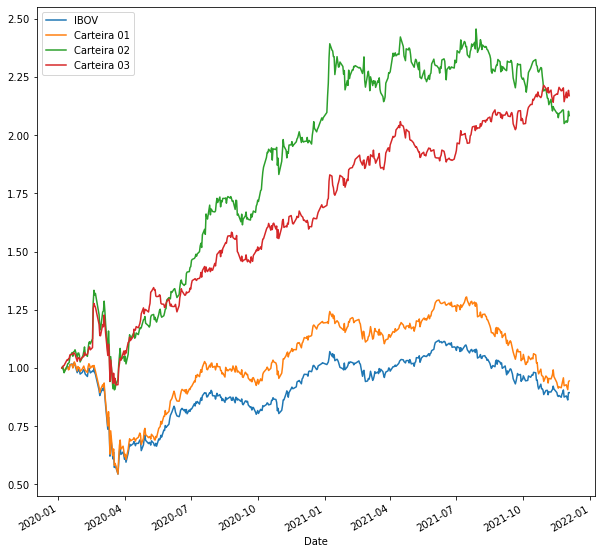

In [70]:
df_final_normalizado[['IBOV', 'Carteira 01', 'Carteira 02', 'Carteira 03']].plot(figsize = (10,10));